In [21]:
#path
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data preprocessing
from sklearn.model_selection import train_test_split
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [22]:
from sklearn.model_selection import train_test_split

In [8]:
from google.colab import files

In [17]:
uploaded = files.upload()

Saving others.rar to others.rar


In [16]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [18]:
pip install patool

     |████████████████████████████████| 77 kB 3.1 MB/s 


In [19]:
import patoolib
patoolib.extract_archive("others.rar")

patool: Extracting others.rar ...
patool: running /usr/bin/unrar x -- /content/others.rar
patool:     with cwd='./Unpack_3ah8vahu'
patool: ... others.rar extracted to `unsplash-images-collection'.


'unsplash-images-collection'

In [23]:
## dataset path
dataset_path_train = Path(r'/content/training_set/training_set')
dataset_path_test = Path(r'/content/test_set/test_set')

# file path for all pngs -> to list png [1.png,2.png,.....]
file_path_train = list(dataset_path_train.glob(r'**/*.jpg'))
file_path_test = list(dataset_path_test.glob(r'**/*.jpg'))

print('filepath: ',file_path_train)

# lambda function to get labels of images
labels_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path_train))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path_test))


# path converted to pandas
file_path_train = pd.Series(file_path_train).astype(str)
#print('file_path:',file_path_train)

file_path_test = pd.Series(file_path_test).astype(str)
#print('file_path:',file_path_test)

labels_train = pd.Series(labels_train)
#print('labels',labels_train)

labels_test = pd.Series(labels_test)
#print('labels',labels_test)

df_train = pd.concat([file_path_train, labels_train], axis=1)
#print(df)
df_test = pd.concat([file_path_test, labels_test], axis=1)


df_test.columns= ['image', 'label']
df_train.columns = ['image', 'label']


df_train.head()

df_test.head(2018)

filepath:  [PosixPath('/content/training_set/training_set/cats/cat.226.jpg'), PosixPath('/content/training_set/training_set/cats/cat.1259.jpg'), PosixPath('/content/training_set/training_set/cats/cat.2327.jpg'), PosixPath('/content/training_set/training_set/cats/cat.2301.jpg'), PosixPath('/content/training_set/training_set/cats/cat.3655.jpg'), PosixPath('/content/training_set/training_set/cats/cat.791.jpg'), PosixPath('/content/training_set/training_set/cats/cat.1636.jpg'), PosixPath('/content/training_set/training_set/cats/cat.860.jpg'), PosixPath('/content/training_set/training_set/cats/cat.1235.jpg'), PosixPath('/content/training_set/training_set/cats/cat.2548.jpg'), PosixPath('/content/training_set/training_set/cats/cat.874.jpg'), PosixPath('/content/training_set/training_set/cats/cat.3965.jpg'), PosixPath('/content/training_set/training_set/cats/cat.41.jpg'), PosixPath('/content/training_set/training_set/cats/cat.954.jpg'), PosixPath('/content/training_set/training_set/cats/cat.22

,image,label
0,/content/test_set/test_set/cats/cat.4153.jpg,cats
1,/content/test_set/test_set/cats/cat.4383.jpg,cats
2,/content/test_set/test_set/cats/cat.4431.jpg,cats
3,/content/test_set/test_set/cats/cat.4691.jpg,cats
4,/content/test_set/test_set/cats/cat.4397.jpg,cats
...,...,...
2013,/content/test_set/test_set/dogs/dog.4633.jpg,dogs
2014,/content/test_set/test_set/dogs/dog.4231.jpg,dogs
2015,/content/test_set/test_set/dogs/dog.4692.jpg,dogs
2016,/content/test_set/test_set/dogs/dog.4654.jpg,dogs


In [24]:
## dataset path
path = Path(r'/content/others')


# file path for all pngs -> to list png [1.png,2.png,.....]
file_path = list(path.glob(r'**/*.jpg'))

print('filepath: ',file_path)

# lambda function to get labels of images
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))


# path converted to pandas
file_path = pd.Series(file_path).astype(str)

labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)
#print(df)


df.columns = ['image', 'label']


df.head()


filepath:  [PosixPath('/content/others/photo-1635951485250-9e6e54bb896b.jpg'), PosixPath('/content/others/photo-1538883689728-2c32af36a313.jpg'), PosixPath('/content/others/photo-1634148529256-c4eea4b56aab.jpg'), PosixPath('/content/others/photo-1634226363964-98187a7e55cf.jpg'), PosixPath('/content/others/photo-1626443330298-6954c60c256e.jpg'), PosixPath('/content/others/photo-1569174237922-5689ad487104.jpg'), PosixPath('/content/others/photo-1632175169571-2b12d9709fee.jpg'), PosixPath('/content/others/photo-1637094090928-cb95001ef49f.jpg'), PosixPath('/content/others/photo-1508138221679-760a23a2285b.jpg'), PosixPath('/content/others/photo-1635250576368-9177a91f6697.jpg'), PosixPath('/content/others/photo-1599420186946-7b6fb4e297f0 (3).jpg'), PosixPath('/content/others/photo-1637310917417-a270927f4fba.jpg'), PosixPath('/content/others/photo-1638195157505-5a4b33446acb.jpg'), PosixPath('/content/others/photo-1620921575116-fb8902865f81.jpg'), PosixPath('/content/others/photo-1634589327639

,image,label
0,/content/others/photo-1635951485250-9e6e54bb89...,others
1,/content/others/photo-1538883689728-2c32af36a3...,others
2,/content/others/photo-1634148529256-c4eea4b56a...,others
3,/content/others/photo-1634226363964-98187a7e55...,others
4,/content/others/photo-1626443330298-6954c60c25...,others


In [25]:
o_train,o_test=train_test_split(df,test_size=0.2,random_state=30)

In [26]:
o_train.label.value_counts()

others    650
Name: label, dtype: int64

In [27]:
o_test.label.value_counts()

others    163
Name: label, dtype: int64

In [28]:
df_train=df_train.append(o_train)

In [29]:
df_test=df_test.append(o_test)

In [30]:
df_train.label.value_counts()

dogs      4005
cats      4000
others     650
Name: label, dtype: int64

In [31]:
df_test.label.value_counts()

dogs      1012
cats      1011
others     163
Name: label, dtype: int64

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))# subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ### Image show 
    ### plt imread reads images from dataframe image path
    ax.imshow(plt.imread(df_train.image[i]))
    ### set title of data frame label
    ax.set_title(df_train.label[i])
    
plt.show()

In [ ]:
### Read count of label from dataframe
lis=list(df_train.label.value_counts())
countcats=lis[0]

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))# subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ### Image show 
    ### plt imread reads images from dataframe image path
    ax.imshow(plt.imread(df_train.image[i+countcats]))
    ### set title of data frame label
    ax.set_title(df_train.label[i+countcats])
    
plt.show()

In [32]:
### Read count of label from dataframe
df_train.label.value_counts()

dogs      4005
cats      4000
others     650
Name: label, dtype: int64

In [33]:
x_train,x_val = train_test_split(df_train,test_size=0.2,random_state=30)

In [34]:
print("Shape of training data", x_train.shape)
print("Shape of test data", df_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (6924, 2)
Shape of test data (2186, 2)
Shape of validation data (1731, 2)


In [35]:
image_data_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=df_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 6924 validated image filenames belonging to 3 classes.
Found 2186 validated image filenames belonging to 3 classes.
Found 1731 validated image filenames belonging to 3 classes.


In [36]:
input_shape=(200,200,3)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 64)        0

In [38]:
from tensorflow.keras.optimizers import Adam
#Adaptive Movement Estimation 

In [39]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
217/217 [==============================] - 121s 504ms/step - loss: 1.7168 - accuracy: 0.4688 - val_loss: 0.8776 - val_accuracy: 0.4801
Epoch 2/50
217/217 [==============================] - 108s 497ms/step - loss: 0.8731 - accuracy: 0.4918 - val_loss: 0.8557 - val_accuracy: 0.5326
Epoch 3/50
217/217 [==============================] - 108s 498ms/step - loss: 0.8603 - accuracy: 0.5181 - val_loss: 0.8483 - val_accuracy: 0.5500
Epoch 4/50
217/217 [==============================] - 108s 498ms/step - loss: 0.8298 - accuracy: 0.5367 - val_loss: 0.8218 - val_accuracy: 0.5713
Epoch 5/50
217/217 [==============================] - 108s 499ms/step - loss: 0.7990 - accuracy: 0.5592 - val_loss: 0.7640 - val_accuracy: 0.6135
Epoch 6/50
217/217 [==============================] - 108s 499ms/step - loss: 0.7748 - accuracy: 0.5794 - val_loss: 0.8324 - val_accuracy: 0.5644
Epoch 7/50
217/217 [==============================] - 108s 499ms/step - loss: 0.7524 - accuracy: 0.5999 - val_loss: 0.7355 -

In [40]:
model.save('multiclass_classification.h5')
#model = keras.models.load_model('model-1.h5')

In [41]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

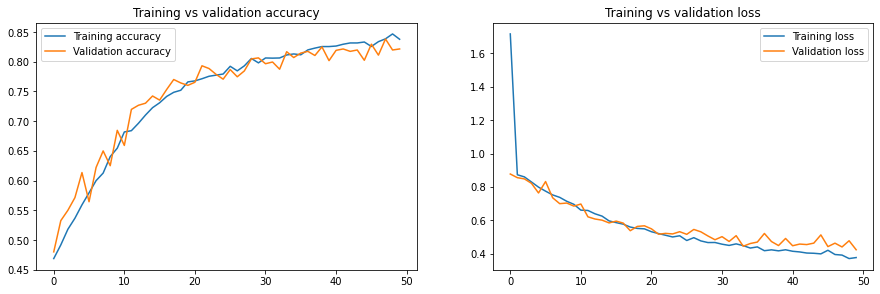

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [43]:
est_accuracy = model.evaluate(test)[1]

69/69 [==============================] - 26s 379ms/step - loss: 0.4177 - accuracy: 0.8426


In [53]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 200, 200, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image4.jpg')
	# load model
	#model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

[0. 1. 0.]


In [46]:
pred = model.predict(test)

In [47]:
import numpy as np
pred = np.argmax(pred, axis=1)

In [48]:
labels = train.class_indices
labels

{'cats': 0, 'dogs': 1, 'others': 2}

In [1]:
!pwd

/content


In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [11]:
! pip install -q kaggle

In [12]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [13]:
! cp kaggle.json ~/.kaggle/

In [14]:
! chmod 600  ~/.kaggle/kaggle.json

In [15]:
! kaggle datasets download -d tongpython/cat-and-dog

 99% 215M/218M [00:01<00:00, 191MB/s]
100% 218M/218M [00:01<00:00, 162MB/s]
